In [95]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold 
from sklearn import tree
from sklearn import metrics

%matplotlib inline

In [96]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

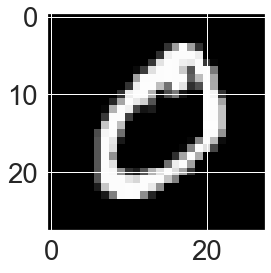

In [97]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [98]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [99]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

/Users/rajagopal/mlenv/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


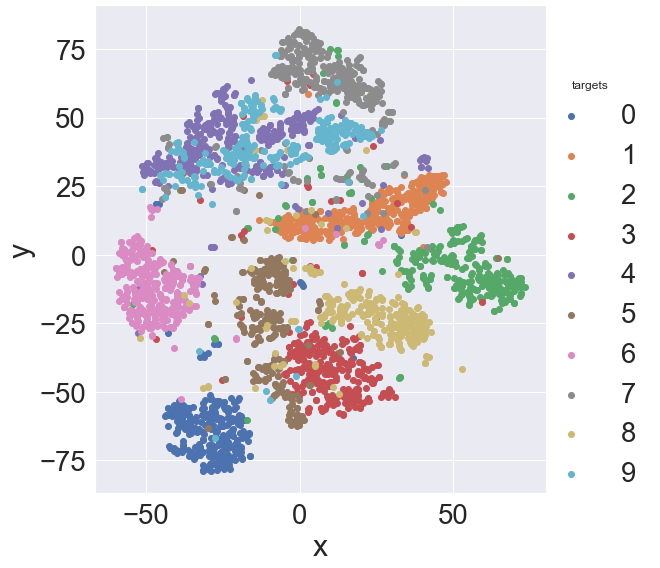

In [100]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [101]:
df = pd.read_csv("data/winequality-red.csv",sep=";")

In [102]:
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [103]:
df = df.sample(frac=1).reset_index(drop=True)

In [104]:
df_train,df_test = df.head(1000),df.tail(599)

In [105]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [106]:
cols = ['fixed acidity',
'volatile acidity', 'citric acid','residual sugar', 'chlorides',
'free sulfur dioxide', 'total sulfur dioxide', 'density',
'pH', 'sulphates', 'alcohol']

In [107]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [108]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [109]:
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions )
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions )
train_accuracy,test_accuracy


(0.585, 0.5342237061769616)

In [110]:
train_accuracies = [0.5] 
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol'
    ]

    clf.fit(df_train[cols], df_train.quality)

    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score( df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions )

    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)

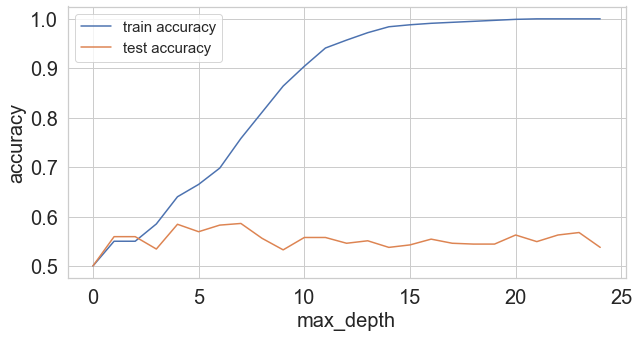

In [111]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20)
plt.show()

Text(0, 0.5, 'count')

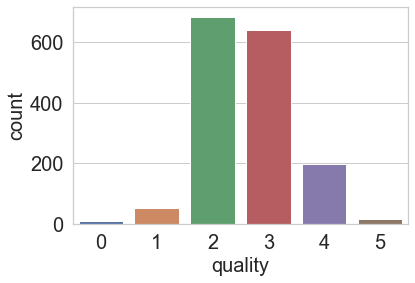

In [112]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

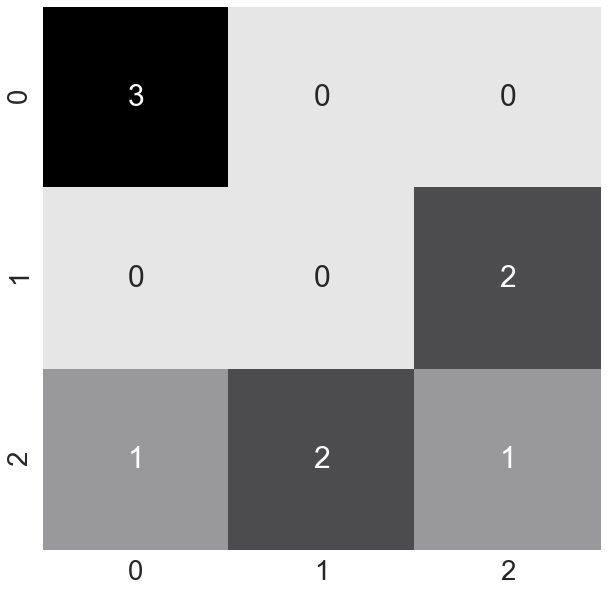

In [113]:

y_true = [0, 1, 2, 0, 1, 2,0, 2, 2] #some predictions
y_pred = [0, 2, 1, 0, 2, 1,0, 0, 2] # get confusion matrix from



cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

In [114]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [1, 0],
    []
    ]


In [115]:
y_pred = [
    [0,1,2],
    [1],
    [0,2,3],
    [2,3,4,0],
    [0]
    ]

In [128]:
def sum(elem):
    sm = 0
    for i in elem:
        sm+=i
    return sm

def pk(y_true,y_pred,k):
    if k==0:
        return 0
    common_values= set(y_pred[:k]).intersection(set(y_true))
    return len(common_values)/len(y_pred[:k])   

def apk(y_true, y_pred, k):
    pk_values=[]
    for iter in range(1, k + 1):
        pk_values.append(pk(y_true, y_pred, iter))
    if len(pk_values) == 0: 
        return 0
    return sum(pk_values) / len(pk_values)

def mapk(y_true, y_pred, k):
    apk_values = []
    for i in range(len(y_true)):
        apk_values.append(apk(y_true[i],y_pred[i],k))
    return sum(apk_values) / len(apk_values)

In [130]:
for j in range(1,4):
    print(f"{j}: {mapk(y_true,y_pred,j)}")       


1: 0.0
2: 0.05
3: 0.07777777777777777


In [64]:
set(y_pred[0][:1])

{0}